In [1]:
import numpy as np
import re
import requests
from bs4  import BeautifulSoup as soup
from tqdm import tqdm
import networkx as nx
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from pychord import Chord, ChordProgression
%matplotlib inline

In [2]:
def trans(target, current):
    # target -> current
    keytable = {'C': 0, 'Db': 1, 'C#': 1, 'D': 2, 'Eb': 3, 'D#':3, 'E': 4, 'F': 5, 'Gb': 6, 'F#':6, 'G': 7, 'Ab': 8, 'G#':8, 'A': 9, 'Bb': 10, 'A#': 10, 'B': 11}
    
    n = keytable.get(target)-keytable.get(current)
    return n

In [3]:
def chord_tonality(url):
    try:
        s = requests.get(url)
    except:
        print('error')
        return None, None
    m = re.search(r'{&quot;content&quot;:&quot;(.+)&quot;,&quot;revision_id&quot;',s.text)
    if m is None:
        return None, None
    tonal = re.search(r'tonality&quot;:&quot;(\w+)&quot;', s.text)
    if tonal is not None:
        tonal = re.search(r'tonality&quot;:&quot;(\w+)&quot;', s.text).group(1)
    return [re.findall(r'\[ch\]([\w#\.-]+)\[\/ch\]',m.group(1)), tonal]

In [4]:
def getgraphforlist(filepath):
    with open(filepath) as f:
        lines  = f.readlines()
    urls = [i[:-1] for i in lines]
    G = nx.MultiDiGraph()
    for url in tqdm(urls):
        chords, tone = chord_tonality(url)
        if chords is None:
            continue
        ch = zip(chords[:-1],chords[1:])
        ch =  [i for i in ch]
        G.add_edges_from(ch)
    weights = [0 for i in G.edges]
    for i,e in enumerate(G.edges):
        weights[i] =  np.log(e[2]+2)
    plt.figure(figsize=(18,18))
    nx.draw_networkx(G, width=weights )
    return G

In [6]:
def getgraphforsong(url):
    chords, tone = chord_tonality(url)
    if chords is None:
        return None
    ch = zip(chords[:-1],chords[1:])
    ch =  [i for i in ch]
    G.add_edges_from(ch)
    weights = [0 for i in G.edges]
    for i,e in enumerate(G.edges):
        weights[i] =  np.log(e[2]+2)
    plt.figure(figsize=(18,18))
    nx.draw_networkx(G, width=weights )
    return G

100%|██████████| 30/30 [01:42<00:00,  3.40s/it]
/Users/xieewenz/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xieewenz/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


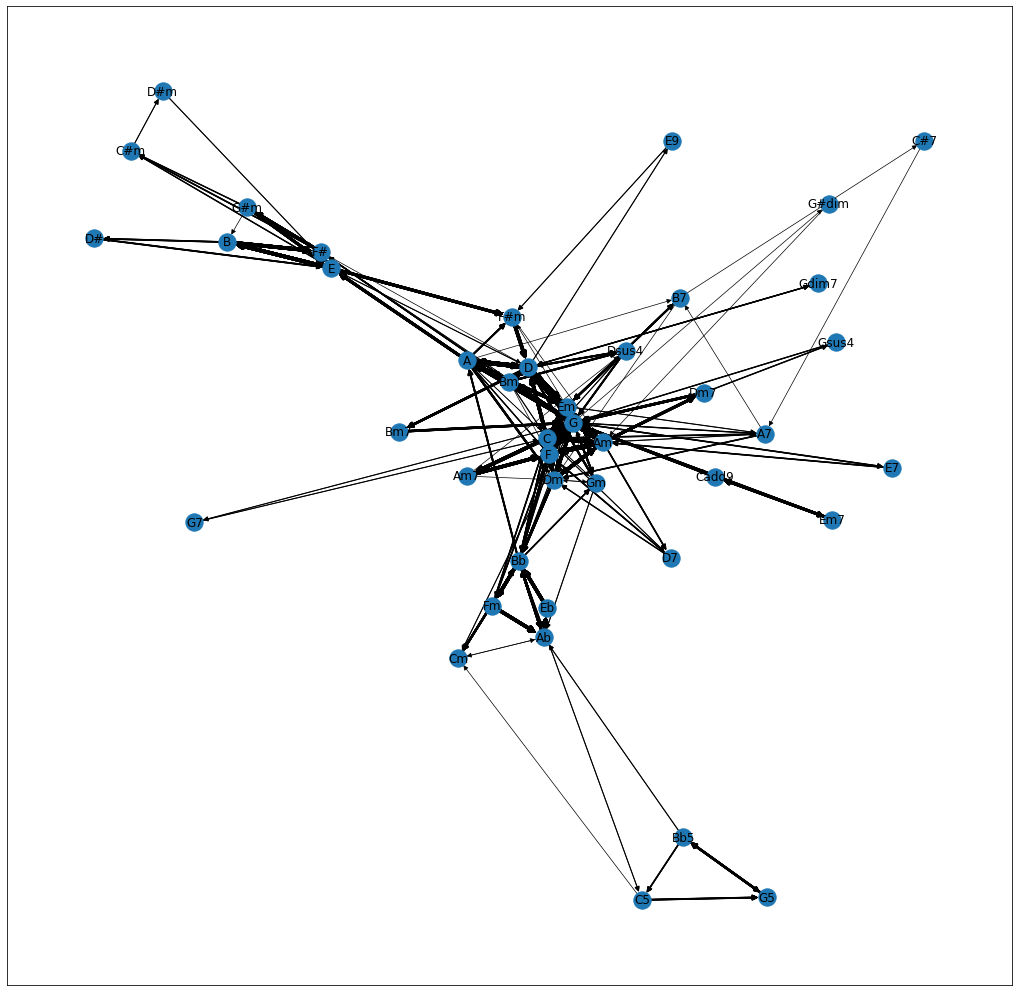

In [5]:
getgraphforlist('pop.txt')